#INTRODUCCIÓN

Queremos realizar una inversión, pero no es muy alta, por lo que no podemos hacer una gran dispersión dentro de las opciones que tenemos. 
Necesitamos generar una herramienta que nos muestre las correlacciones que tienen estas a fin de no invertir toda la plata en acciones que tengan la misma tendencia. Por otro lado entender cual es la mejor opción de inversion, dependiendo del momento de esta acción, de baja o de alza.


#EXPLICACION

Generaremos una herramienta donde podramos comparar distintas acciones que se alimente de una api para obtener información de cierre de las cotizaciones de las acciones seleccionadas dentro del tiempo elegido y podremos observar el analisis de la herramienta.
Dentro de estos analisis, se realizara tambien sobre la apertura, cierre, ganancia o perdida por dia.
En este caso se busco analizar empresas americanas que estan en distintos rubros, tecnologia, banco, aereo, comidas y laboratorio. Dentro de este analisis queremos entenden si tiene correlacion positiva o negativa alguna de estas y buscar cuales serian las mejores opciones.
Acciones Seleccionadas para el analisis:

NVDA: Nvidia
AMZN: Amazon
V: Visa
MA: Mastercard
JPM: JP Morgan
AAL: American Airline
ABT: Abboat
IBM: IBM
SBUX: Starbuck
META: Meta

In [1]:
# Se obtiene la informacion de la API


import requests
import pandas as pd


# Lista de símbolos de acciones
lista_acciones = ['NVDA','AMZN','V','MA','JPM','AAL','ABT','IBM','SBUX','META']



def obtener_datos_acciones(simbolos):
    datos_acciones = {}  # Diccionario para almacenar los DataFrames

    for symbol in simbolos:
        # URL de la API y parámetros de la solicitud
        url = 'http://api.marketstack.com/v1/eod'
        params = {
            'access_key': '1acaa9e79f37983218ce58c2064467aa',
            'symbols': symbol,
            'date_from': '2023-10-18',
            'date_to': '2023-12-29'
        }

        # Realizar la solicitud GET
        response = requests.get(url, params=params)

        # Verificar si la solicitud fue exitosa (código 200)
        if response.status_code == 200:
            # Convertir la respuesta a JSON
            data = response.json()

            # Verificar si hay datos presentes en la respuesta
            if 'data' in data and data['data']:
                # Crear un DataFrame a partir de los datos
                df_symbol = pd.DataFrame(data['data'])

                                # Convertir la columna 'date' a tipo datetime
                
                df_symbol['date'] = pd.to_datetime(df_symbol['date'], format="%Y-%m-%dT%H:%M:%S%z").dt.date

                         
                # Almacenar el DataFrame en el diccionario
                datos_acciones[symbol] = df_symbol
            else:
                print(f"No hay datos para {symbol}.")
        else:
            # Mostrar un mensaje de error si la solicitud no fue exitosa
            print(f"Error en la solicitud para {symbol}. Código de estado: {response.status_code}")

    return datos_acciones



# Obtener datos de acciones y almacenar en un diccionario de DataFrames
datos_acciones = obtener_datos_acciones(lista_acciones)

# Crear un DataFrame vacío para almacenar los datos finales
df_final = pd.DataFrame()

# Iterar sobre las claves (símbolos) y valores (DataFrames) del diccionario original
for symbol, df in datos_acciones.items():
    # Verificar si la columna 'date' está presente
    if 'date' in df.columns:
        # Seleccionar todas las columnas del DataFrame
        df_subset = df.set_index('date')

        # Renombrar las columnas con el símbolo correspondiente
        df_subset = df_subset.rename(columns={col: f'{col}_{symbol}' for col in df_subset.columns})

        # Concatenar el DataFrame actual al DataFrame final
        df_final = pd.concat([df_final, df_subset], axis=1)
    else:
        print(f"No hay columna 'date' en los datos de {symbol}.")


# Mostrar el DataFrame final


print(df_final)


            open_NVDA  high_NVDA  low_NVDA  close_NVDA  volume_NVDA  \
date                                                                  
2023-12-29    498.130   499.9700  487.5100      495.22   38929330.0   
2023-12-28    496.430   498.8400  494.1200      495.22   24622700.0   
2023-12-27    495.110   496.8000  490.8500      494.17   23324000.0   
2023-12-26    489.680   496.0000  489.6000      492.79   24370800.0   
2023-12-22    491.950   493.8300  484.6700      488.30   25213900.0   
2023-12-21    488.110   490.9500  484.1900      489.90   29996800.0   
2023-12-20    496.550   499.9900  480.9800      481.11   39625300.0   
2023-12-19    494.240   497.0000  488.9500      496.04   46383000.0   
2023-12-18    494.000   504.3300  491.5000      500.77   41160800.0   
2023-12-15    481.940   494.0400  481.2000      488.90   47947800.0   
2023-12-14    483.900   486.7000  474.2200      483.50   39052000.0   
2023-12-13    476.290   485.9400  476.0800      480.88   44546400.0   
2023-1

In [2]:
# Filtrar columnas que comienzan con 'close' con los nombres de las acciones


df_close = df_final[[col for col in df_final.columns if col.startswith('close')]]

df_close = df_close.rename(columns=lambda x: x.replace('close_', ''))



# Mostrar el DataFrame resultante
print(df_close)

df_close.shape

              NVDA    AMZN       V      MA     JPM    AAL     ABT     IBM  \
date                                                                        
2023-12-29  495.22  151.94  260.35  426.51  170.10  13.74  110.07  163.55   
2023-12-28  495.22  153.38  260.40  426.32  170.30  13.98  110.40  163.75   
2023-12-27  494.17  153.34  258.93  424.36  169.40  13.99  109.79  163.46   
2023-12-26  492.79  153.41  259.16  423.67  168.39  14.11  109.23  163.21   
2023-12-22  488.30  153.42  258.43  424.10  167.40  14.31  109.03  162.14   
2023-12-21  489.90  153.84  259.54  423.44  167.50  14.35  108.48  160.78   
2023-12-20  481.11  152.12  257.11  419.45  166.55  13.98  107.40  160.05   
2023-12-19  496.04  153.79  259.99  425.47  168.45  14.30  108.42  161.56   
2023-12-18  500.77  154.07  258.37  424.43  166.23  14.24  108.06  162.74   
2023-12-15  488.90  149.97  258.03  418.57  165.23  14.49  107.29  162.23   
2023-12-14  483.50  147.42  258.73  418.56  163.99  14.59  108.60  162.91   

(51, 10)

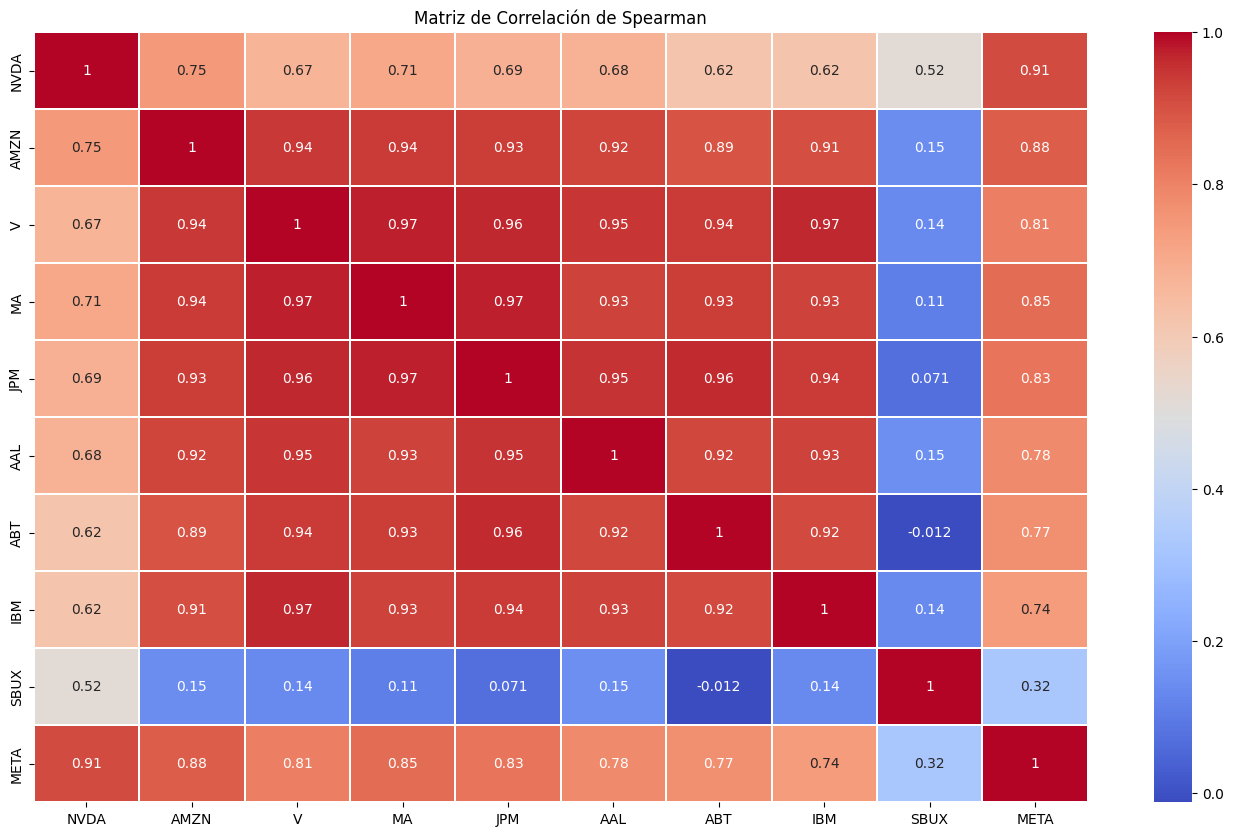

In [3]:
# Se genera un mapa de calor para entender la correlacion

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de Spearman
correlation_matrix = df_close.corr(method="spearman")

# Crear un mapa de calor
plt.figure(figsize=(17, 10))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.25)
plt.title('Matriz de Correlación de Spearman')
plt.show()


c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\raula\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

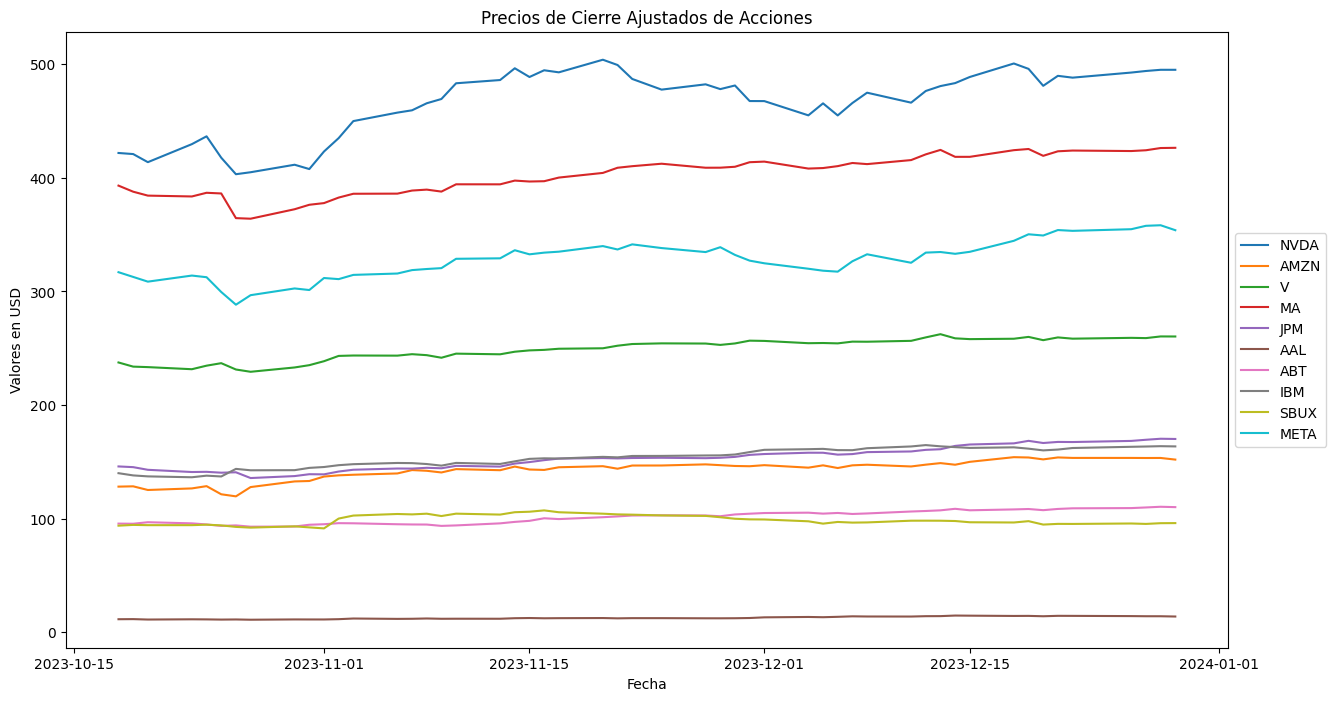

In [4]:
# Se analiza los valores de las acciones durante un periodo de tiempo.

import seaborn as sns
import matplotlib.pyplot as plt



# Graficar utilizando Seaborn
plt.figure(figsize=(15, 8))
for accion in lista_acciones:
    sns.lineplot(data=df_close, x=df_close.index, y=f'{accion}', label=accion)

plt.xlabel('Fecha')
plt.ylabel('Valores en USD')
plt.title('Precios de Cierre Ajustados de Acciones')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [5]:
# Analizamos el precio de apertura, cierre en los ultimos tiempos para ver si es momento de ingresar o no.

import plotly.graph_objects as go

# Iterate through each symbol in lista_acciones
for symbol in lista_acciones:
    # Check if necessary columns are present
    if f'open_{symbol}' in df_final.columns and f'high_{symbol}' in df_final.columns and f'low_{symbol}' in df_final.columns and f'close_{symbol}' in df_final.columns:
        # Extract relevant columns and convert the index to datetime.date
        df_stock = df_final[[f'open_{symbol}', f'high_{symbol}', f'low_{symbol}', f'close_{symbol}']]
        df_stock.index = pd.to_datetime(df_stock.index).date

        # Create a candlestick chart
        fig = go.Figure(data=[go.Candlestick(x=df_stock.index,
                        open=df_stock[f'open_{symbol}'],
                        high=df_stock[f'high_{symbol}'],
                        low=df_stock[f'low_{symbol}'],
                        close=df_stock[f'close_{symbol}'])])

        # Update layout for better display
        fig.update_xaxes(type='category')
        fig.update_layout(
            title=f'Candlestick Chart for {symbol}',
            xaxis_title='Filtro de Fechas',
            yaxis_title='Stock Price',
            xaxis=dict(type='category'),
        )
        
        # Show the chart
        fig.show()
    else:
        print(f"Missing data columns for {symbol}. Cannot generate candlestick chart.")



In [6]:

### Se puede observar una gran dependencia entre Visa, Amazon, JP Morgan, lo cual tiene logica por ser todas del rubro banco. 

Pero lo curioso es ver la correlación entre American Airline(AAL) que tiene una correlación con muchas de las empresas americanas. Deberiamos analizar si IBM no le da servicio a AAL y es parte de la alta correlatividad de uno y la otra.
NVidia es una accion donde la correlacion esta dada con META y con SBUX (entendemos por causalidad).
Sbux no es una accion con alta correlatividad con las otras.

Podemos ver NVDA, AMZN, SBUX subiendo en la cotizacion, no asi META que esta muy inestable. El valor de AAL es muy bajo y esta estable sin ningun cambio. El resto como era de esperarse por la correlatividad tiene un proceso todos al mismo tiempo creciente, pero muy leve.


### CONCLUSIONES

Oportunidades de ingreso AAL, ABT, NVDA y JPM

En resumen si un cliente viene con esta propuesta de cartera, la propuesta es JPM ya que esta con correlación con todas las demas bancarias, pero actualmente el precio de entrada esta bajo. 
Nvda sigue siendo una oportunidad de una acción independiente y que reacción de otra manera al resto.
ABT es una acción para invertor en otro mercado, como el farmaceutico, de modo creciente, pero muy vinculado a todo el mercado americano.


SyntaxError: invalid syntax (3417676756.py, line 3)

In [ ]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pandas-profiling


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pandas-profiling in c:\users\raula\appdata\local\programs\python\python311\lib\site-packages (3.2.0)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade pandas-profiling
!pip install --upgrade pydantic


In [ ]:
pip install pydantic==1.8.3


Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.10.3
ERROR: Could not find a version that satisfies the requirement pydantic==1.8.3 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.1, 0.2, 0.2.1, 0.3, 0.4, 0.5, 0.6, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7, 0.7.1, 0.8, 0.9, 0.9.1, 0.10, 0.11, 0.11.1, 0.11.2, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.15, 0.16, 0.16.1, 0.17, 0.18, 0.18.1, 0.18.2, 0.19, 0.20a1, 0.20, 0.20.1, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27a1, 0.27, 0.28, 0.29, 0.30, 0.30.1, 0.31, 0.31.1, 0.32, 0.32.1, 0.32.2, 1.0b1, 1.0b2, 1.0, 1.1, 1.1.1, 1.2, 1.3, 1.4, 1.5, 1.5.1, 1.6, 1.6.1, 1.6.2, 1.7, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.8, 1.8.1, 1.8.2, 1.9.0a1, 1.9.0a2, 1.9.0, 1.9.1, 1.9.2, 1.10.0a1, 1.10.0a2, 1.10.0b1, 1.10.0, 1.10.1, 1.10.2, 1.10.4, 1.10.5, 1.10.6, 1.10.7, 1.10.8, 1.10.9, 1.10.10, 1.10.11, 1.10.12, 1.10.13, 2.0a1, 2.0a2, 2.0a3, 2.0a4, 2.0b1, 2.0b2, 2.0b3, 2.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0, 2.1.1, 2.2.0, 2.2.1, 2.3.0, 2.4.0, 2.4.1, 2.4.2, 2.5.0b1, 2.5.0,

In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydantic==1.8.3


Note: you may need to restart the kernel to use updated packages.


ERROR: Ignored the following yanked versions: 1.10.3
ERROR: Could not find a version that satisfies the requirement pydantic==1.8.3 (from versions: 0.0.1, 0.0.2, 0.0.3, 0.0.4, 0.0.5, 0.0.6, 0.0.7, 0.0.8, 0.1, 0.2, 0.2.1, 0.3, 0.4, 0.5, 0.6, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7, 0.7.1, 0.8, 0.9, 0.9.1, 0.10, 0.11, 0.11.1, 0.11.2, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.15, 0.16, 0.16.1, 0.17, 0.18, 0.18.1, 0.18.2, 0.19, 0.20a1, 0.20, 0.20.1, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27a1, 0.27, 0.28, 0.29, 0.30, 0.30.1, 0.31, 0.31.1, 0.32, 0.32.1, 0.32.2, 1.0b1, 1.0b2, 1.0, 1.1, 1.1.1, 1.2, 1.3, 1.4, 1.5, 1.5.1, 1.6, 1.6.1, 1.6.2, 1.7, 1.7.1, 1.7.2, 1.7.3, 1.7.4, 1.8, 1.8.1, 1.8.2, 1.9.0a1, 1.9.0a2, 1.9.0, 1.9.1, 1.9.2, 1.10.0a1, 1.10.0a2, 1.10.0b1, 1.10.0, 1.10.1, 1.10.2, 1.10.4, 1.10.5, 1.10.6, 1.10.7, 1.10.8, 1.10.9, 1.10.10, 1.10.11, 1.10.12, 1.10.13, 2.0a1, 2.0a2, 2.0a3, 2.0a4, 2.0b1, 2.0b2, 2.0b3, 2.0, 2.0.1, 2.0.2, 2.0.3, 2.1.0, 2.1.1, 2.2.0, 2.2.1, 2.3.0, 2.4.0, 2.4.1, 2.4.2, 2.5.0b1, 2.5.0,

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     - 0 bytes ? 0:00:00
     - 11.4 kB ? 0:00:00
     - 40.1 kB 1.2 MB/s 0:00:00
     \ 83.2 kB 733.3 kB/s 0:00:00
     | 83.2 kB 733.3 kB/s 0:00:00
     | 83.2 kB 733.3 kB/s 0:00:00
     / 83.2 kB 733.3 kB/s 0:00:00
     / 83.2 kB 733.3 kB/s 0:00:00
     - 83.2 kB 733.3 kB/s 0:00:00
     - 83.2 kB 733.3 kB/s 0:00:00
     \ 83.2 kB 733.3 kB/s 0:00:00
     \ 83.2 kB 733.3 kB/s 0:00:00
     | 83.2 kB 733.3 kB/s 0:00:00
     / 238.0 kB 395.8 kB/s 0:00:00
     / 453.8 kB 704.0 kB/s 0:00:00
     - 779.2 kB 1.1 MB/s 0:00:00
     - 1.3 MB 1.8 MB/s 0:00:00
     \ 1.9 MB 2.4 MB/s 0:00:00
     \ 2.4 MB 2.9 MB/s 0:00:00
     | 3.0 MB 3.4 MB/s 0:00:00
     | 3.5 MB 3.8 MB/s 0:00:00
     / 3.9 MB 4.0 MB/s 0:00:00
     / 4.6 MB 4.6 MB/s 0:00:01
     - 5.2 MB 4.9 MB/s 0:00:01
     - 5.7 MB 5.2 MB/s 0:00:01
     \ 6.3 MB 5.4 MB/s 0:00:01
     | 6.8 MB 5.7 MB/s 0:00:01
     | 7.4 MB 5.9 MB/s 0:00:01
     / 7.9 MB 6.1 MB/s 0:00:01
     / 8.5 MB 6.3 MB/s 0:00:01
     - 9.0 MB 6.5 MB/s 0:00:01
     - 9.6

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.5 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling


C:\Users\raula\AppData\Local\Temp\ipykernel_15372\921261217.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
profile = pandas_profiling.ProfileReport(df_close)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#this is a test
